In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
#check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

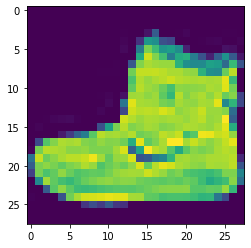

In [5]:
#plot a single sample
plt.imshow(train_data[0])

In [52]:
#create a small list so we can index onto our training labels so they are human-readable
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

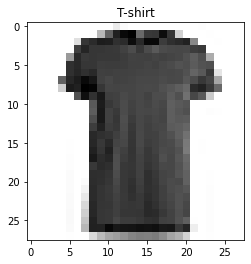

In [6]:
plt.imshow(train_data[17], cmap=plt.cm.binary) #binary - white-black scale
plt.title(class_names[train_labels[17]])

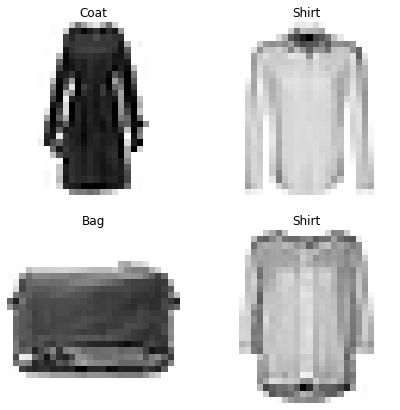

In [7]:
#plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [8]:
#building a mmulti-class classification model
#input shape = 28 x 28 (the shape of one image)
#output shape = 10 (one per class of clothing)
#loss function = tf.keras.losses.CategoricalCrossentropy() - labels (dopasowanie) need to be one-hot encoded
#SparseCategoricalCrossentropy - if we dont use one-hot encoded labels, we have 10 numbers for each category of clothing
#output layer activation = softmax

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

non_norm_hisotry = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1629 - accuracy: 0.1628 - val_loss: 1.8070 - val_accuracy: 0.2133
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7039 - accuracy: 0.2534 - val_loss: 1.6755 - val_accuracy: 0.2821
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6331 - accuracy: 0.2817 - val_loss: 1.6065 - val_accuracy: 0.3005
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6032 - accuracy: 0.2863 - val_loss: 1.6056 - val_accuracy: 0.2981
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5975 - accuracy: 0.2932 - val_loss: 1.6016 - val_accuracy: 0.2884
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5913 - accuracy: 0.2967 - val_loss: 1.5698 - val_accuracy: 0.3157
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5738 - accuracy: 0.3153 - val_loss: 1.5715 - val_accuracy:

In [9]:
#or like this:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='CategoricalCrossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

non_norm_history = model.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, 
                             validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1629 - accuracy: 0.1628 - val_loss: 1.8070 - val_accuracy: 0.2133
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7039 - accuracy: 0.2534 - val_loss: 1.6755 - val_accuracy: 0.2821
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6331 - accuracy: 0.2817 - val_loss: 1.6065 - val_accuracy: 0.3005
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6032 - accuracy: 0.2863 - val_loss: 1.6056 - val_accuracy: 0.2981
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5975 - accuracy: 0.2932 - val_loss: 1.6016 - val_accuracy: 0.2884
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5913 - accuracy: 0.2967 - val_loss: 1.5698 - val_accuracy: 0.3157
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5738 - accuracy: 0.3153 - val_loss: 1.5715 - val_accuracy:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
train_data.min(), train_data.max()

(0, 255)

In [12]:
#normalization 
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [13]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

norm_history = model_1.fit(train_data_norm, train_labels, epochs=10,
           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [14]:
#only by normalizing data, accuracy increases from 30% to 80%

<AxesSubplot:title={'center':'Normalized data'}>

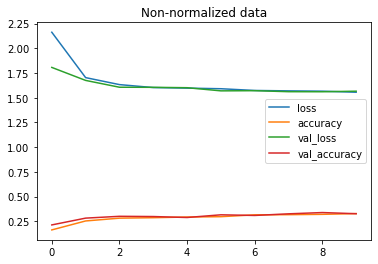

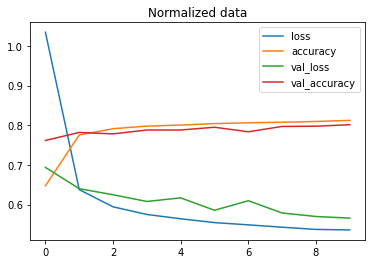

In [15]:
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

In [16]:
#finding ideal learning rate
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_2.fit(train_data_norm, train_labels, epochs=40,
                               validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the ideal learning rate')

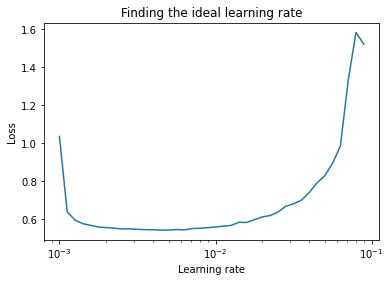

In [17]:
lrs = 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate")

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss='SparseCategoricalCrossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics='accuracy')

history_3 = model_3.fit(train_data_norm, train_labels, epochs = 20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [33]:
import itertools 
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(Y_true, Y_pred, classes=None, figsize=(10,10), text_size=15):

    #create the confusion matrix
    cm = confusion_matrix(Y_true, Y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)

    #create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel='Predicted Label',
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    #set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                 horizontalalignment='center',
                 color='white' if cm[i,j] > threshold else "black",
                 size=text_size)
            

In [24]:
y_probs  = model_3.predict(test_data_norm)

313/313 [==============================] - 0s 1ms/step


array([8.5629975e-11, 3.5361430e-13, 2.6633730e-05, 4.6356291e-08,
       5.0949668e-05, 9.6118920e-02, 8.1777891e-08, 9.1869116e-02,
       4.0605105e-03, 8.0787367e-01], dtype=float32)

In [26]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361430e-13, 2.6633730e-05, 4.6356291e-08,
        5.0949668e-05, 9.6118920e-02, 8.1777891e-08, 9.1869116e-02,
        4.0605105e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [27]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [28]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

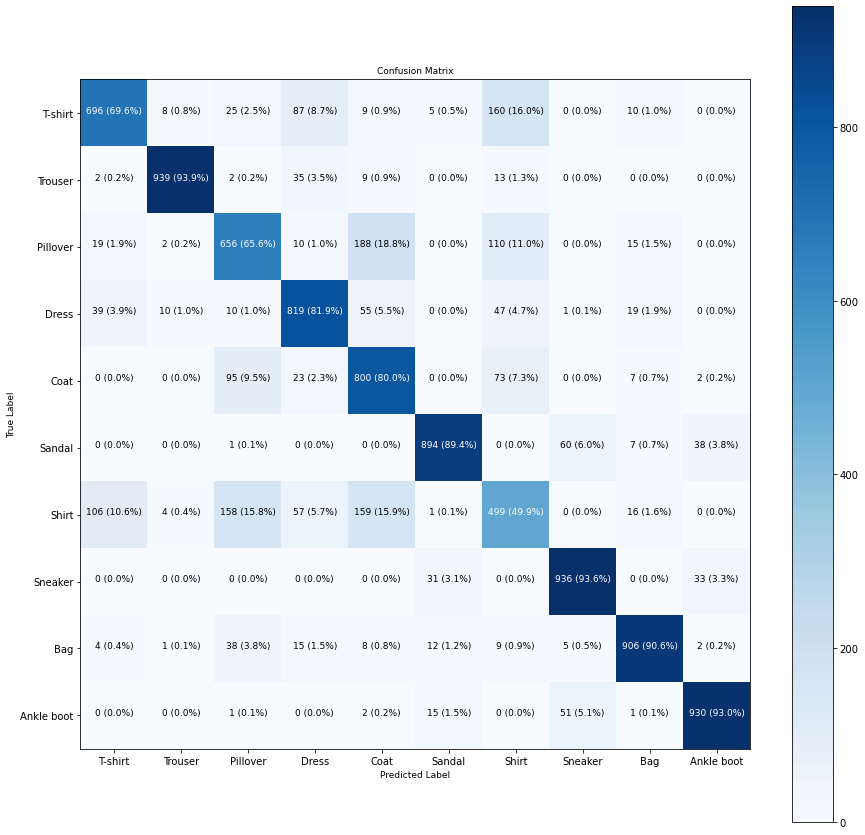

In [38]:
make_confusion_matrix(Y_true = test_labels, Y_pred = y_preds, classes=class_names, figsize=(15,15), text_size=9)

In [47]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 [==============================] - 0s 16ms/step


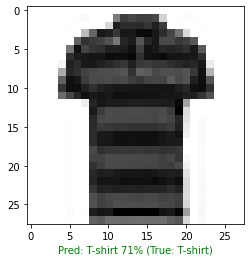

In [58]:
plot_random_image(model = model_3, images = test_data_norm, true_labels = test_labels, classes = class_names)

In [59]:
model_3.layers

In [61]:
weigths, biases = model_3.layers[1].get_weights()

weigths, weigths.shape

(array([[ 0.71502596, -0.06077074, -0.99763083, -1.0484312 ],
        [ 0.27732125, -0.47155362, -0.52916473,  0.02329261],
        [ 0.77524304,  0.5402765 , -1.1288569 , -0.7426155 ],
        ...,
        [-0.3945346 ,  0.4762862 , -0.2264154 ,  0.2550593 ],
        [-0.4051578 ,  0.61810106,  0.23928426, -0.503876  ],
        [ 0.2388456 ,  0.11606928, -0.12131295,  0.04352394]],
       dtype=float32),
 (784, 4))

In [62]:
biases, biases.shape

(array([ 2.4485763e-02, -6.1493268e-04, -2.7230188e-01,  8.1124896e-01],
       dtype=float32),
 (4,))

In [63]:
#Every neuron has a bias vector. Each of these is paired with a weights matrix.
#The bias vector get initialized as zeros (at least in the case of TF Dense layer)
#The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
